In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)
y = 3 * X[:, 0] + 5 * X[:, 1] - 2 * X[:, 2] + np.random.randn(100)

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [2]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:", explained_variance)


Explained variance by each principal component: [0.29005782 0.23214006 0.18701323 0.15426411 0.13652477]


In [3]:
# Select the number of principal components to use (e.g., select components that explain 95% of the variance)
cumulative_explained_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components selected: {n_components}")

# Reduce the dimensionality of the data
X_pca_reduced = X_pca[:, :n_components]


Number of components selected: 5


In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

# Fit linear regression model on the principal components
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)


Mean Squared Error: 0.9759382193626612


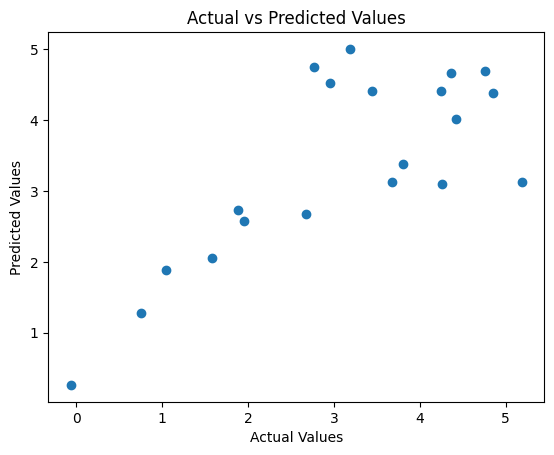

In [5]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
